<a href="https://colab.research.google.com/github/abhijith-one77/mamun/blob/main/Mamun_dataset3_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re
import ast
import json

In [3]:
df_general = pd.read_csv('patients_table.csv')
df_general = df_general.drop(columns=['Unnamed: 0'])
df_general.head()


,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000690,F,86,2150,2008 - 2010,2152-01-30
1,10001919,M,59,2124,2017 - 2019,2124-12-20
2,10002667,F,58,2187,2020 - 2022,NaN
3,10007117,F,22,2189,2020 - 2022,NaN
4,10007174,M,70,2162,2011 - 2013,NaN


In [4]:
df_admit = pd.read_csv('patient_admissions.csv')
df_admit = df_admit.drop(columns=['Unnamed: 0'])
df_admit.head()


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000690,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,EW EMER.,P941QM,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0
1,10000690,25860671,2150-11-02 18:02:00,2150-11-12 13:45:00,NaN,EW EMER.,P26QQ4,EMERGENCY ROOM,REHAB,Medicare,English,WIDOWED,WHITE,2150-11-02 11:41:00,2150-11-02 19:37:00,0
2,10000690,26146595,2152-01-28 23:40:00,2152-01-30 15:56:00,NaN,EW EMER.,P61PLH,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,English,WIDOWED,WHITE,2152-01-28 15:41:00,2152-01-29 01:22:00,0
3,10000690,26504700,2150-07-03 02:46:00,2150-07-07 15:42:00,NaN,EW EMER.,P46JQK,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,English,WIDOWED,WHITE,2150-07-02 22:59:00,2150-07-03 03:55:00,0
4,10001919,29897682,2124-04-20 00:00:00,2124-04-21 13:47:00,NaN,SURGICAL SAME DAY ADMISSION,P64FA3,PHYSICIAN REFERRAL,HOME,Private,English,MARRIED,OTHER,NaN,NaN,0


In [5]:
df_disease = pd.read_csv('disease_diagnosis_code.csv')
df_disease = df_disease.drop(columns=['Unnamed: 0'])
df_disease.head()


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000690,23280645,1,4280,9
1,10000690,23280645,2,486,9
2,10000690,23280645,3,4271,9
3,10000690,23280645,4,2764,9
4,10000690,23280645,5,42833,9


In [6]:
df_merged_data = pd.merge(df_general, df_admit, on='subject_id', how='inner')
df_merged_data.head()

df_final_merged = pd.merge(df_merged_data, df_disease, on=['subject_id', 'hadm_id'], how='inner')
df_final_merged.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,admittime,dischtime,deathtime,...,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,seq_num,icd_code,icd_version
0,10000690,F,86,2150,2008 - 2010,2152-01-30,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,1,4280,9
1,10000690,F,86,2150,2008 - 2010,2152-01-30,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,2,486,9
2,10000690,F,86,2150,2008 - 2010,2152-01-30,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,3,4271,9
3,10000690,F,86,2150,2008 - 2010,2152-01-30,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,4,2764,9
4,10000690,F,86,2150,2008 - 2010,2152-01-30,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,5,42833,9


In [7]:
cols = df_final_merged.columns.tolist()
hadm_id_col = 'hadm_id'
subject_id_idx = cols.index('subject_id')

# Remove hadm_id from its current position
if hadm_id_col in cols:
    cols.remove(hadm_id_col)

# Insert hadm_id after subject_id
cols.insert(subject_id_idx + 1, hadm_id_col)

df_final_merged = df_final_merged[cols]
df_final_merged.head()

,subject_id,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,deathtime,...,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,seq_num,icd_code,icd_version
0,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,1,4280,9
1,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,2,486,9
2,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,3,4271,9
3,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,4,2764,9
4,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,5,42833,9


In [8]:
df_final_merged

,subject_id,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,deathtime,...,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,seq_num,icd_code,icd_version
0,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,1,4280,9
1,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,2,486,9
2,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,3,4271,9
3,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,4,2764,9
4,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,...,Medicare,English,WIDOWED,WHITE,2150-09-16 16:00:00,2150-09-16 21:03:00,0,5,42833,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137631,19999297,21439025,M,42,2162,2008 - 2010,2162-08-23,2162-08-14 23:55:00,2162-08-23 04:16:00,2162-08-23 04:16:00,...,Other,English,SINGLE,MULTIPLE RACE/ETHNICITY,2162-08-14 18:26:00,2162-08-15 02:01:00,1,12,30301,9
137632,19999297,21439025,M,42,2162,2008 - 2010,2162-08-23,2162-08-14 23:55:00,2162-08-23 04:16:00,2162-08-23 04:16:00,...,Other,English,SINGLE,MULTIPLE RACE/ETHNICITY,2162-08-14 18:26:00,2162-08-15 02:01:00,1,13,2768,9
137633,19999297,21439025,M,42,2162,2008 - 2010,2162-08-23,2162-08-14 23:55:00,2162-08-23 04:16:00,2162-08-23 04:16:00,...,Other,English,SINGLE,MULTIPLE RACE/ETHNICITY,2162-08-14 18:26:00,2162-08-15 02:01:00,1,14,3051,9
137634,19999297,21439025,M,42,2162,2008 - 2010,2162-08-23,2162-08-14 23:55:00,2162-08-23 04:16:00,2162-08-23 04:16:00,...,Other,English,SINGLE,MULTIPLE RACE/ETHNICITY,2162-08-14 18:26:00,2162-08-15 02:01:00,1,15,2874,9


# Merging ICD Columns

In [9]:
# Reading GEM fixed-width file (ICD-9 -> ICD-10)
# Positions in the guide are 1-indexed; Python colspecs are 0-indexed, end-exclusive.
colspecs = [
    (0, 5),    # ICD-9 (1-5)
    (6, 13),   # ICD-10 (7-13)
    (14, 15),  # approximate flag (15)
    (15, 16),  # no map flag (16)
    (16, 17),  # combination flag (17)
    (17, 18),  # scenario (18)
    (18, 19),  # choice list (19)
]
names = ["icd9", "icd10", "approximate", "nomap", "combination", "scenario", "choice_list"]

gem = pd.read_fwf("2018_I9gem.txt", colspecs=colspecs, header=None, names=names, dtype=str)

# Clean & type-cast
gem["icd9"]  = gem["icd9"].str.strip()
gem["icd10"] = gem["icd10"].str.strip()

for c in ["approximate", "nomap", "combination", "scenario", "choice_list"]:
    gem[c] = gem[c].astype(int)

gem.head()


,icd9,icd10,approximate,nomap,combination,scenario,choice_list
0,0010,A000,0,0,0,0,0
1,0011,A001,0,0,0,0,0
2,0019,A009,0,0,0,0,0
3,0020,A0100,1,0,0,0,0
4,0021,A011,0,0,0,0,0


In [10]:
# Normalizing ICD codes in merged dataset
def norm_icd(x):
    """Uppercase, strip spaces, remove dots. Keeps letters for V/E (ICD-9) and alphanumerics (ICD-10)."""
    if pd.isna(x):
        return x
    return str(x).strip().upper().replace(".", "")

df_final_merged["icd_norm"] = df_final_merged["icd_code"].apply(norm_icd)


In [11]:
# Converting ICD9 to ICD10
# Split into ICD-9 and ICD-10 rows
dx9  = df_final_merged[df_final_merged["icd_version"] == 9].copy()
dx10 = df_final_merged[df_final_merged["icd_version"] == 10].copy()

# Map ICD-9 -> ICD-10 candidates
dx9_mapped = dx9.merge(
    gem,
    left_on="icd_norm",
    right_on="icd9",
    how="left"
)

# Add columns to dx10 so schemas match
dx10_mapped = dx10.copy()
dx10_mapped["icd10"] = dx10_mapped["icd_norm"]
dx10_mapped["approximate"] = 0
dx10_mapped["nomap"] = 0
dx10_mapped["combination"] = 0
dx10_mapped["scenario"] = 0
dx10_mapped["choice_list"] = 0

# Combine back
dx_all = pd.concat([dx9_mapped, dx10_mapped], ignore_index=True)

In [12]:

dx_all["unmapped_flag"] = (dx_all["nomap"] == 1).astype(int)
dx_all.loc[dx_all["nomap"] == 1, "icd10"] = None


In [13]:
# Dealing with 'combination' entries (scenario + choice_list)
# For rows that are not combination entries, cluster is just the single icd10
noncomb = dx_all[dx_all["combination"] == 0].copy()
noncomb["icd10_cluster"] = noncomb["icd10"].apply(lambda x: [x] if pd.notna(x) else [])

# For combination entries, build clusters per (subject_id, hadm_id, seq_num, scenario)
comb = dx_all[dx_all["combination"] == 1].copy()

comb_clusters = (
    comb.groupby(["subject_id", "hadm_id", "seq_num", "scenario"])[("icd10")]
        .apply(lambda s: sorted({x for x in s if pd.notna(x)}))
        .reset_index(name="icd10_cluster")
)

# Merge cluster metadata back (optional: keep approx/unmapped flags etc.)
comb_meta = comb[["subject_id", "hadm_id", "seq_num", "scenario", "approximate", "unmapped_flag"]].drop_duplicates()

comb_final = comb_clusters.merge(
    comb_meta,
    on=["subject_id", "hadm_id", "seq_num", "scenario"],
    how="left"
)

# For a unified dataframe, keep consistent columns:
# Removed redundant 'icd_norm' from keep_cols as it's already in df_final_merged.columns
keep_cols = [c for c in df_final_merged.columns if c != "icd_norm"] + ["icd_norm", "icd10_cluster", "approximate", "unmapped_flag", "scenario"]
noncomb_final = noncomb.assign(scenario=0)

dx_harmonized = pd.concat([
    noncomb_final[keep_cols],
    comb_final.merge(df_final_merged, on=["subject_id", "hadm_id", "seq_num"], how="left")[keep_cols]
], ignore_index=True)

dx_harmonized.head()
dx_harmonized.tail()

,subject_id,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,deathtime,...,edouttime,hospital_expire_flag,seq_num,icd_code,icd_version,icd_norm,icd10_cluster,approximate,unmapped_flag,scenario
174437,19906407,25334305,M,34,2189,2008 - 2010,NaN,2189-01-01 20:09:00,2189-01-05 16:15:00,NaN,...,2189-01-01 21:45:00,0,3,25042,9,25042,"[E1121, E1165]",1.0,0,1.0
174438,19906407,25673023,M,34,2189,2008 - 2010,NaN,2192-12-22 04:24:00,2192-12-24 17:31:00,NaN,...,2192-12-22 04:54:00,0,5,25092,9,25092,"[E1165, E118]",1.0,0,1.0
174439,19906407,27667314,M,34,2189,2008 - 2010,NaN,2189-06-17 07:15:00,2189-07-02 13:56:00,NaN,...,NaN,0,2,41511,9,41511,"[I2690, I2699, T800XXA, T81718A, T8172XA, T828...",1.0,0,1.0
174440,19940586,24061735,M,50,2138,2011 - 2013,NaN,2138-10-06 22:43:00,2138-10-09 11:55:00,NaN,...,2138-10-06 23:36:00,0,1,82322,9,82322,"[S82201A, S82401A]",1.0,0,1.0
174441,19940586,24061735,M,50,2138,2011 - 2013,NaN,2138-10-06 22:43:00,2138-10-09 11:55:00,NaN,...,2138-10-06 23:36:00,0,1,82322,9,82322,"[S82202A, S82402A]",1.0,0,2.0


In [14]:
dx_harmonized.to_csv('dx_harmonized.csv')

In [15]:
def parse_list(x):
    """Parse stringified lists like "['I10','E119']" into Python list."""
    if x is None:
        return []
    x = str(x).strip()
    if x == "" or x == "[]":
        return []
    try:
        v = ast.literal_eval(x)
        return v if isinstance(v, list) else []
    except Exception:
        return []

# ---------------------------
# 1) Load CCSR mapping file (codes + categories + descriptions)
# ---------------------------
ccsr = pd.read_csv("DXCCSR_v2026-1.csv", dtype=str, keep_default_na=False)

# Clean column names: remove leading/trailing apostrophes/spaces
ccsr.columns = [re.sub(r"^'+|'+$", "", c.strip()) for c in ccsr.columns]

# Identify the parallel category and description columns (1..6)
cat_cols  = [c for c in ccsr.columns if re.fullmatch(r"CCSR CATEGORY [1-6]", c)]
desc_cols = [f"{c} DESCRIPTION" for c in cat_cols]

# Clean ICD-10 codes (no decimals, uppercase) for join consistency
ccsr["icd10"] = (
    ccsr["ICD-10-CM CODE"]
    .str.strip()
    .str.strip("'")
    .str.replace(".", "", regex=False)
    .str.upper()
)

# Clean category & description columns
for c in cat_cols + desc_cols:
    ccsr[c] = ccsr[c].astype(str).str.strip().str.strip("'")

# (A) Build LONG mapping for categories only (icd10 -> ccsr_category)
ccsr_long_cat = (
    ccsr[["icd10"] + cat_cols]
    .melt(id_vars="icd10", value_vars=cat_cols, value_name="ccsr_category")
)
ccsr_long_cat = ccsr_long_cat[~ccsr_long_cat["ccsr_category"].isin(["", " ", None, np.nan])]
ccsr_long_cat = ccsr_long_cat.drop(columns="variable").drop_duplicates()

# (B) Build LONG mapping for (icd10 -> ccsr_category + ccsr_description) by aligning parallel columns
ccsr_cat_long = (
    ccsr[["icd10"] + cat_cols]
    .melt(id_vars="icd10", value_vars=cat_cols, var_name="cat_var", value_name="ccsr_category")
)
ccsr_desc_long = (
    ccsr[["icd10"] + desc_cols]
    .melt(id_vars="icd10", value_vars=desc_cols, var_name="desc_var", value_name="ccsr_description")
)

# Align by index (melt preserves order)
assert len(ccsr_cat_long) == len(ccsr_desc_long)
ccsr_long_full = pd.concat([ccsr_cat_long, ccsr_desc_long.drop(columns=['icd10'])], axis=1)
ccsr_long_full = (
    ccsr_long_full[~ccsr_long_full["ccsr_category"].isin(["", " ", None, np.nan])]
    .drop(columns=["cat_var", "desc_var"])
    .drop_duplicates(subset=["icd10", "ccsr_category", "ccsr_description"])
)

# ---------------------------
# 2) Load harmonized diagnoses (from your previous step) and explode ICD-10 clusters
# ---------------------------
dx = pd.read_csv("dx_harmonized.csv", dtype=str, keep_default_na=False)

dx["icd10_list"] = dx["icd10_cluster"].apply(parse_list)

# Explode to one ICD-10 per row
dx_long = dx.explode("icd10_list", ignore_index=True)
dx_long["icd10"] = (
    dx_long["icd10_list"]
    .astype(str)
    .str.strip()
    .str.replace(".", "", regex=False)
    .str.upper()
)
dx_long.loc[dx_long["icd10"].isin(["", "NAN", "NONE"]), "icd10"] = pd.NA

# ---------------------------
# 3) Merge ICD-10 -> CCSR category + description
# ---------------------------
dx_ccsr_long = dx_long.merge(ccsr_long_full, on="icd10", how="left")

# ---------------------------
# 4) Aggregate back to one row per (subject_id, hadm_id, seq_num)
# ---------------------------
key_cols = ["subject_id", "hadm_id", "seq_num"]

# Build code list
ccsr_agg_codes = (
    dx_ccsr_long.dropna(subset=["ccsr_category"])
    .groupby(key_cols)["ccsr_category"]
    .apply(lambda s: sorted(set(s)))
    .reset_index(name="ccsr_list_sorted") # Renamed to avoid confusion
)

# Build aligned description list (category -> description; keep one per category; sort by code)
def collect_desc(rows: pd.DataFrame):
    # rows has columns: ccsr_category, ccsr_description
    pairs = {(cat, desc) for cat, desc in zip(rows["ccsr_category"], rows["ccsr_description"]) if pd.notna(cat)}
    cat_to_desc = {}
    for cat, desc in pairs:
        if cat not in cat_to_desc and isinstance(desc, str) and desc.strip() != "":
            cat_to_desc[cat] = desc.strip()
    cats_sorted = sorted(cat_to_desc.keys())
    desc_sorted = [cat_to_desc[c] for c in cats_sorted]
    return pd.Series({"ccsr_list_sorted": cats_sorted, "ccsr_description": desc_sorted})

ccsr_agg_desc = (
    dx_ccsr_long.dropna(subset=["ccsr_category"])
    .groupby(key_cols)
    .apply(collect_desc)
    .reset_index()
)

# Merge lists back to harmonized dataframe
dx_with_ccsr = dx.merge(ccsr_agg_desc, on=key_cols, how="left")

# Removed the creation of 'ccsr_list' as 'ccsr_list_sorted' is sufficient
# For backward compatibility: ensure list-typed outputs
dx_with_ccsr["ccsr_description"] = dx_with_ccsr["ccsr_description"].apply(lambda x: x if isinstance(x, list) else [])



/tmp/ipython-input-3607413553.py:117: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(collect_desc)


In [16]:
dx_with_ccsr

,Unnamed: 0,subject_id,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,...,icd_code,icd_version,icd_norm,icd10_cluster,approximate,unmapped_flag,scenario,icd10_list,ccsr_list_sorted,ccsr_description
0,0,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,4280,9,4280,['I50814'],1.0,0,0.0,[I50814],[CIR019],[Heart failure]
1,1,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,4280,9,4280,['I509'],1.0,0,0.0,[I509],[CIR019],[Heart failure]
2,2,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,486,9,486,['J189'],1.0,0,0.0,[J189],[RSP002],[Pneumonia (except that caused by tuberculosis)]
3,3,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,4271,9,4271,['I472'],1.0,0,0.0,[I472],[CIR017],[Cardiac dysrhythmias]
4,4,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,2764,9,2764,['E874'],0.0,0,0.0,[E874],[END011],[Fluid and electrolyte disorders]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174437,174437,19906407,25334305,M,34,2189,2008 - 2010,,2189-01-01 20:09:00,2189-01-05 16:15:00,...,25042,9,25042,"['E1121', 'E1165']",1.0,0,1.0,"[E1121, E1165]","[END003, END005, GEN001]","[Diabetes mellitus with complication, Diabetes..."
174438,174438,19906407,25673023,M,34,2189,2008 - 2010,,2192-12-22 04:24:00,2192-12-24 17:31:00,...,25092,9,25092,"['E1165', 'E118']",1.0,0,1.0,"[E1165, E118]","[END003, END005]","[Diabetes mellitus with complication, Diabetes..."
174439,174439,19906407,27667314,M,34,2189,2008 - 2010,,2189-06-17 07:15:00,2189-07-02 13:56:00,...,41511,9,41511,"['I2690', 'I2699', 'T800XXA', 'T81718A', 'T817...",1.0,0,1.0,"[I2690, I2699, T800XXA, T81718A, T8172XA, T828...","[CIR013, INF003, INJ033, INJ037]","[Acute pulmonary embolism, Bacterial infection..."
174440,174440,19940586,24061735,M,50,2138,2011 - 2013,,2138-10-06 22:43:00,2138-10-09 11:55:00,...,82322,9,82322,"['S82201A', 'S82401A']",1.0,0,1.0,"[S82201A, S82401A]",[INJ005],"[Fracture of the lower limb (except hip), init..."


In [17]:
cols_2 = dx_with_ccsr.columns.tolist()
ccsr_cols_to_add = ['ccsr_list_sorted', 'ccsr_description']

# Remove existing ccsr columns and icd10_list if they are already present
for col_name in ccsr_cols_to_add + ['icd10_list']:
    if col_name in cols_2:
        cols_2.remove(col_name)

# Find the index of 'icd10_cluster' to insert 'ccsr_cols_to_add' after it
if 'icd10_cluster' in cols_2:
    icd10_cluster_idx = cols_2.index('icd10_cluster')
    # Insert the ccsr columns right after 'icd10_cluster'
    # Iterate in reverse to maintain correct insertion indices if multiple columns are inserted at the same logical point
    for i, col_name in enumerate(reversed(ccsr_cols_to_add)):
        cols_2.insert(icd10_cluster_idx + 1, col_name)

# Reorder the DataFrame using the updated column list
dx_with_ccsr = dx_with_ccsr[cols_2]
dx_with_ccsr.head()

,Unnamed: 0,subject_id,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,...,seq_num,icd_code,icd_version,icd_norm,icd10_cluster,ccsr_list_sorted,ccsr_description,approximate,unmapped_flag,scenario
0,0,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,1,4280,9,4280,['I50814'],[CIR019],[Heart failure],1.0,0,0.0
1,1,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,1,4280,9,4280,['I509'],[CIR019],[Heart failure],1.0,0,0.0
2,2,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,2,486,9,486,['J189'],[RSP002],[Pneumonia (except that caused by tuberculosis)],1.0,0,0.0
3,3,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,3,4271,9,4271,['I472'],[CIR017],[Cardiac dysrhythmias],1.0,0,0.0
4,4,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,4,2764,9,2764,['E874'],[END011],[Fluid and electrolyte disorders],0.0,0,0.0


In [18]:
dx_with_ccsr.to_csv("dx_with_ccsr_desc.csv", index=False)

In [19]:
dx_with_ccsr

,Unnamed: 0,subject_id,hadm_id,gender,anchor_age,anchor_year,anchor_year_group,dod,admittime,dischtime,...,seq_num,icd_code,icd_version,icd_norm,icd10_cluster,ccsr_list_sorted,ccsr_description,approximate,unmapped_flag,scenario
0,0,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,1,4280,9,4280,['I50814'],[CIR019],[Heart failure],1.0,0,0.0
1,1,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,1,4280,9,4280,['I509'],[CIR019],[Heart failure],1.0,0,0.0
2,2,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,2,486,9,486,['J189'],[RSP002],[Pneumonia (except that caused by tuberculosis)],1.0,0,0.0
3,3,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,3,4271,9,4271,['I472'],[CIR017],[Cardiac dysrhythmias],1.0,0,0.0
4,4,10000690,23280645,F,86,2150,2008 - 2010,2152-01-30,2150-09-16 19:48:00,2150-09-24 13:50:00,...,4,2764,9,2764,['E874'],[END011],[Fluid and electrolyte disorders],0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174437,174437,19906407,25334305,M,34,2189,2008 - 2010,,2189-01-01 20:09:00,2189-01-05 16:15:00,...,3,25042,9,25042,"['E1121', 'E1165']","[END003, END005, GEN001]","[Diabetes mellitus with complication, Diabetes...",1.0,0,1.0
174438,174438,19906407,25673023,M,34,2189,2008 - 2010,,2192-12-22 04:24:00,2192-12-24 17:31:00,...,5,25092,9,25092,"['E1165', 'E118']","[END003, END005]","[Diabetes mellitus with complication, Diabetes...",1.0,0,1.0
174439,174439,19906407,27667314,M,34,2189,2008 - 2010,,2189-06-17 07:15:00,2189-07-02 13:56:00,...,2,41511,9,41511,"['I2690', 'I2699', 'T800XXA', 'T81718A', 'T817...","[CIR013, INF003, INJ033, INJ037]","[Acute pulmonary embolism, Bacterial infection...",1.0,0,1.0
174440,174440,19940586,24061735,M,50,2138,2011 - 2013,,2138-10-06 22:43:00,2138-10-09 11:55:00,...,1,82322,9,82322,"['S82201A', 'S82401A']",[INJ005],"[Fracture of the lower limb (except hip), init...",1.0,0,1.0


# Feature Engineering

In [20]:
# === Input (final merged file) ===
infile = "dx_with_ccsr_desc.csv"
df = pd.read_csv(infile, dtype=str, keep_default_na=False)

# --- Treat blank-like strings as missing, without dropping/overwriting columns ---
BLANKS = {"", " ", "NA", "N/A", "None", "NONE", "NaN", "nan"}
def to_na(s: pd.Series) -> pd.Series:
    return s.apply(lambda v: (np.nan if (isinstance(v, str) and v.strip() in BLANKS) else v))

for col in ["gender", "race", "admission_type", "hospital_expire_flag", "anchor_age", "anchor_year"]:
    if col in df.columns:
        df[col] = to_na(df[col])

# --- Gender: normalize to {M,F,NaN} in the SAME column ---
if "gender" in df.columns:
    g = df["gender"].str.upper().str.strip()
    df["gender"] = g.where(g.isin(["M","F"]))  # any other value -> NaN

# --- Numeric encoders for race & admission_type (add code columns; keep originals) ---
label_maps = {}
for col in ["race", "admission_type", "gender"]:
    if col in df.columns:
        ser = df[col].astype(str).str.strip()
        ser = ser.where(~ser.isin(BLANKS))          # keep NaN as missing
        cat = pd.Categorical(ser)                   # categories inferred from this file
        df[col + "_code"] = cat.codes.astype("int32")  # -1 represents missing
        label_maps[col] = {cat.categories[i]: int(i) for i in range(len(cat.categories))}

# --- Target: coerce to {0,1}; keep the column ---
if "hospital_expire_flag" in df.columns:
    df["hospital_expire_flag"] = (
        pd.to_numeric(df["hospital_expire_flag"], errors="coerce")
          .fillna(0).clip(0,1).astype(int)
    )

# --- Parse timestamps non-destructively ---
for tcol in ["admittime", "dischtime", "deathtime"]:
    if tcol in df.columns:
        df[f"{tcol}_dt"] = pd.to_datetime(df[tcol], errors="coerce")

# --- Length of stay (LOS) features (added) ---
if {"admittime_dt","dischtime_dt"}.issubset(df.columns):
    disch_proxy = df["dischtime_dt"].copy()
    if "deathtime_dt" in df.columns:
        disch_proxy = disch_proxy.fillna(df["deathtime_dt"])
    los_hours = (disch_proxy - df["admittime_dt"]).dt.total_seconds() / 3600.0
    df["los_hours"] = np.where(np.isfinite(los_hours), np.maximum(0, los_hours), np.nan)
    df["los_days"]  = df["los_hours"] / 24.0

# --- Calendar/time features (added) ---
if "admittime_dt" in df.columns:
    df["adm_year"]    = df["admittime_dt"].dt.year
    df["adm_month"]   = df["admittime_dt"].dt.month
    df["adm_day"]     = df["admittime_dt"].dt.day
    df["adm_hour"]    = df["admittime_dt"].dt.hour
    df["adm_weekday"] = df["admittime_dt"].dt.weekday  # 0=Mon..6=Sun
    df["adm_weekend"] = df["adm_weekday"].isin([5,6]).astype(int)

# --- Age at admission (added) from anchor_age/anchor_year and admission year ---
if {"anchor_age","anchor_year"}.issubset(df.columns) and "adm_year" in df.columns:
    aa = pd.to_numeric(df["anchor_age"], errors="coerce")
    ay = pd.to_numeric(df["anchor_year"], errors="coerce")
    df["age_at_admit"] = aa + (df["adm_year"] - ay)
    df.loc[(df["age_at_admit"] < 0) | (df["age_at_admit"] > 120), "age_at_admit"] = np.nan

# --- Optional breadth feature from CCSR list (added) ---
if "ccsr_list_sorted" in df.columns:
    def count_list_like(x):
        if isinstance(x, list): return len(x)
        if isinstance(x, str) and x.startswith("[") and x.endswith("]"):
            try:
                v = ast.literal_eval(x)
                return len(v) if isinstance(v, list) else 0
            except Exception:
                return 0
        return 0
    df["n_ccsr"] = df["ccsr_list_sorted"].apply(count_list_like)

# --- Save the full dataframe with ALL original columns + features/encodings ---
out_all = "dx_encoded_feats.csv"
df.to_csv(out_all, index=False)

# Save label maps for reproducibility of numeric encoders
with open("categorical_label_maps.json","w") as f:
    json.dump(label_maps, f, indent=2)

print("Saved", out_all, "with shape", df.shape)
print("Saved categorical_label_maps.json with keys:", list(label_maps.keys()))


Saved dx_encoded_feats.csv with shape (174442, 48)
Saved categorical_label_maps.json with keys: ['race', 'admission_type', 'gender']


In [21]:
print(label_maps)

{'race': {'AMERICAN INDIAN/ALASKA NATIVE': 0, 'ASIAN': 1, 'ASIAN - ASIAN INDIAN': 2, 'ASIAN - CHINESE': 3, 'ASIAN - KOREAN': 4, 'ASIAN - SOUTH EAST ASIAN': 5, 'BLACK/AFRICAN': 6, 'BLACK/AFRICAN AMERICAN': 7, 'BLACK/CAPE VERDEAN': 8, 'BLACK/CARIBBEAN ISLAND': 9, 'HISPANIC OR LATINO': 10, 'HISPANIC/LATINO - CENTRAL AMERICAN': 11, 'HISPANIC/LATINO - COLUMBIAN': 12, 'HISPANIC/LATINO - CUBAN': 13, 'HISPANIC/LATINO - DOMINICAN': 14, 'HISPANIC/LATINO - GUATEMALAN': 15, 'HISPANIC/LATINO - HONDURAN': 16, 'HISPANIC/LATINO - MEXICAN': 17, 'HISPANIC/LATINO - PUERTO RICAN': 18, 'HISPANIC/LATINO - SALVADORAN': 19, 'MULTIPLE RACE/ETHNICITY': 20, 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 21, 'OTHER': 22, 'PATIENT DECLINED TO ANSWER': 23, 'PORTUGUESE': 24, 'SOUTH AMERICAN': 25, 'UNABLE TO OBTAIN': 26, 'UNKNOWN': 27, 'WHITE': 28, 'WHITE - BRAZILIAN': 29, 'WHITE - EASTERN EUROPEAN': 30, 'WHITE - OTHER EUROPEAN': 31, 'WHITE - RUSSIAN': 32}, 'admission_type': {'AMBULATORY OBSERVATION': 0, 'DIRECT EMER.'

# Model Development

## Traditional Model ()

Select the columns


In [26]:
# 1. Reload the three core tables
patients = pd.read_csv("patients_table.csv").drop(columns=["Unnamed: 0"])
admissions = pd.read_csv("patient_admissions.csv")
diagnoses = pd.read_csv("disease_diagnosis_code.csv")

# 2. Merge patients + admissions on subject_id
df_pa = admissions.merge(patients, on="subject_id", how="left")

# 3. Merge with diagnoses on subject_id + hadm_id
df_pad = df_pa.merge(diagnoses, on=["subject_id", "hadm_id"], how="left")

df_pad.head()


,Unnamed: 0_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,...,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,Unnamed: 0_y,seq_num,icd_code,icd_version
0,16,10000690,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,EW EMER.,P941QM,EMERGENCY ROOM,SKILLED NURSING FACILITY,...,0,F,86,2150,2008 - 2010,2152-01-30,100.0,1.0,4280,9.0
1,16,10000690,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,EW EMER.,P941QM,EMERGENCY ROOM,SKILLED NURSING FACILITY,...,0,F,86,2150,2008 - 2010,2152-01-30,101.0,2.0,486,9.0
2,16,10000690,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,EW EMER.,P941QM,EMERGENCY ROOM,SKILLED NURSING FACILITY,...,0,F,86,2150,2008 - 2010,2152-01-30,102.0,3.0,4271,9.0
3,16,10000690,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,EW EMER.,P941QM,EMERGENCY ROOM,SKILLED NURSING FACILITY,...,0,F,86,2150,2008 - 2010,2152-01-30,103.0,4.0,2764,9.0
4,16,10000690,23280645,2150-09-16 19:48:00,2150-09-24 13:50:00,NaN,EW EMER.,P941QM,EMERGENCY ROOM,SKILLED NURSING FACILITY,...,0,F,86,2150,2008 - 2010,2152-01-30,104.0,5.0,42833,9.0


In [28]:
# Suppose you already have a function map_icd9_to_icd10(...) in the notebook
# and you created icd_norm, icd10_cluster before.

df_final = df_pad.copy()

# Example placeholders; reuse the exact code you had:
# df_final["icd_norm"] = ...
# df_final["icd10_cluster"] = ...

df_final.head()
df = df_final.copy()


In [29]:
cols = [
    "subject_id", "hadm_id", "hospital_expire_flag",
    "seq_num", "icd_code",  # or icd_norm if you recreated it
    "gender", "anchor_age", "insurance", "marital_status", "race",
    "admission_type", "admission_location", "discharge_location"
]
df_lstm = df[cols].dropna(subset=["hospital_expire_flag"])


2. Encode diagnoses and build sequences
2.1 Map diagnosis codes to integers


In [30]:
# If you already have icd_norm, replace "icd_code" with "icd_norm" here.
code_col = "icd_code"

diag_vocab = {code: i+1 for i, code in enumerate(sorted(df_lstm[code_col].dropna().unique()))}
# 0 will be padding
df_lstm["diag_id"] = df_lstm[code_col].map(diag_vocab)


2.2 Build per‑admission sequences and targets

In [31]:
# Sort properly
df_lstm = df_lstm.sort_values(["subject_id", "hadm_id", "seq_num"])

# Sequences of diagnosis IDs per admission
seqs = df_lstm.groupby(["subject_id", "hadm_id"])["diag_id"].apply(list)

# Target per admission (mortality)
y = df_lstm.groupby(["subject_id", "hadm_id"])["hospital_expire_flag"].first()


3. Static features per admission
3.1 Choose static columns and aggregate

In [32]:
static_cols = [
    "gender", "anchor_age", "insurance",
    "marital_status", "race",
    "admission_type", "admission_location", "discharge_location"
]

df_static = (df_lstm
             .sort_values(["subject_id", "hadm_id", "seq_num"])
             .groupby(["subject_id", "hadm_id"])[static_cols]
             .first())


3.2 Encode static features

In [33]:
df_static_enc = df_static.copy()

# Example: gender to 0/1
df_static_enc["gender"] = (df_static_enc["gender"] == "M").astype(int)

# One-hot encode categoricals (except anchor_age)
df_static_enc = pd.get_dummies(
    df_static_enc,
    columns=["insurance","marital_status","race",
             "admission_type","admission_location","discharge_location"],
    drop_first=True
)


4. Train / validation / test split (admission-level)


In [34]:
from sklearn.model_selection import train_test_split
import numpy as np

index = seqs.index  # MultiIndex (subject_id, hadm_id)

idx_train, idx_temp = train_test_split(
    np.arange(len(index)),
    test_size=0.3,
    random_state=42,
    stratify=y.values
)

idx_val, idx_test = train_test_split(
    idx_temp,
    test_size=0.5,
    random_state=42,
    stratify=y.values[idx_temp]
)

def take(idx_array):
    sel_index = index[idx_array]
    return seqs.loc[sel_index], y.loc[sel_index], df_static_enc.loc[sel_index]

seq_train, y_train, stat_train = take(idx_train)
seq_val,   y_val,   stat_val   = take(idx_val)
seq_test,  y_test,  stat_test  = take(idx_test)


In [39]:
# Remove rows where diag_id is NaN
df_lstm = df_lstm.dropna(subset=["diag_id"])

# Rebuild seqs and y from the cleaned frame
df_lstm = df_lstm.sort_values(["subject_id", "hadm_id", "seq_num"])

seqs = df_lstm.groupby(["subject_id", "hadm_id"])["diag_id"].apply(list)
y    = df_lstm.groupby(["subject_id", "hadm_id"])["hospital_expire_flag"].first()

# Rebuild static features aligned with the cleaned admissions
df_static = (df_lstm
             .groupby(["subject_id", "hadm_id"])[static_cols]
             .first())

df_static_enc = df_static.copy()
df_static_enc["gender"] = (df_static_enc["gender"] == "M").astype(int)
df_static_enc = pd.get_dummies(
    df_static_enc,
    columns=["insurance","marital_status","race",
             "admission_type","admission_location","discharge_location"],
    drop_first=True
)


5. Pad sequences and build arrays


In [40]:
from sklearn.model_selection import train_test_split
import numpy as np

index = seqs.index

idx_train, idx_temp = train_test_split(
    np.arange(len(index)),
    test_size=0.3,
    random_state=42,
    stratify=y.values
)

idx_val, idx_test = train_test_split(
    idx_temp,
    test_size=0.5,
    random_state=42,
    stratify=y.values[idx_temp]
)

def take(idx_array):
    sel_index = index[idx_array]
    return seqs.loc[sel_index], y.loc[sel_index], df_static_enc.loc[sel_index]

seq_train, y_train, stat_train = take(idx_train)
seq_val,   y_val,   stat_val   = take(idx_val)
seq_test,  y_test,  stat_test  = take(idx_test)



B. Retry padding
Now run again:

In [41]:
max_len = 50

X_train_seq, train_len = pad_sequences(seq_train.tolist(), max_len)
X_val_seq,   val_len   = pad_sequences(seq_val.tolist(),   max_len)
X_test_seq,  test_len  = pad_sequences(seq_test.tolist(),  max_len)


8. Training and evaluation utilities

In [43]:
from sklearn.metrics import roc_auc_score, f1_score

def evaluate(loader, model, device):
    model.eval()
    ys, ps = [], []
    with torch.no_grad():
        for x_seq, lengths, x_static, y in loader:
            x_seq = x_seq.to(device)
            lengths = lengths.to(device)
            x_static = x_static.to(device)
            y = y.to(device)
            out = model(x_seq, lengths, x_static)
            ys.append(y.cpu().numpy())
            ps.append(out.cpu().numpy())
    ys = np.concatenate(ys)
    ps = np.concatenate(ps)
    auc = roc_auc_score(ys, ps)
    f1  = f1_score(ys, (ps >= 0.5).astype(int))
    return auc, f1


1. Recreate padded arrays and static matrices
If you already have seq_train, seq_val, seq_test, stat_train, stat_val, stat_test, you only need:




In [54]:
import numpy as np
import torch

max_len = 50

def pad_sequences(seq_list, max_len):
    padded = np.zeros((len(seq_list), max_len), dtype=np.int64)
    lengths = np.zeros(len(seq_list), dtype=np.int64)
    for i, s in enumerate(seq_list):
        s = s[:max_len]
        padded[i, :len(s)] = s
        lengths[i] = len(s)
    return padded, lengths

X_train_seq, train_len = pad_sequences(seq_train.tolist(), max_len)
X_val_seq,   val_len   = pad_sequences(seq_val.tolist(),   max_len)
X_test_seq,  test_len  = pad_sequences(seq_test.tolist(),  max_len)

X_train_static = stat_train.values.astype(np.float32)
X_val_static   = stat_val.values.astype(np.float32)
X_test_static  = stat_test.values.astype(np.float32)

y_train_t = torch.tensor(y_train.values.astype(np.float32))
y_val_t   = torch.tensor(y_val.values.astype(np.float32))
y_test_t  = torch.tensor(y_test.values.astype(np.float32))



2. Recreate Dataset and DataLoaders

In [55]:
from torch.utils.data import Dataset, DataLoader

class EHRDataset(Dataset):
    def __init__(self, X_seq, lengths, X_static, y):
        self.X_seq = torch.tensor(X_seq, dtype=torch.long)
        self.lengths = torch.tensor(lengths, dtype=torch.long)
        self.X_static = torch.tensor(X_static, dtype=torch.float32)
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return (self.X_seq[idx], self.lengths[idx],
                self.X_static[idx], self.y[idx])

train_ds = EHRDataset(X_train_seq, train_len, X_train_static, y_train_t)
val_ds   = EHRDataset(X_val_seq,   val_len,   X_val_static,   y_val_t)
test_ds  = EHRDataset(X_test_seq,  test_len,  X_test_static,  y_test_t)

batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size)
test_loader  = DataLoader(test_ds,  batch_size=batch_size)


3. Now define static_dim and the model


In [57]:
import torch.nn as nn
import torch.nn.functional as F

vocab_size = len(diag_vocab)
static_dim = X_train_static.shape[1]

class LSTMMortality(nn.Module):
    def __init__(self, vocab_size, static_dim,
                 emb_dim=64, hidden_dim=128, num_layers=1, bidirectional=False):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size + 1, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(
            emb_dim, hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional
        )
        lstm_out_dim = hidden_dim * (2 if bidirectional else 1)
        self.fc1 = nn.Linear(lstm_out_dim + static_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x_seq, lengths, x_static):
        emb = self.embedding(x_seq)
        packed = nn.utils.rnn.pack_padded_sequence(
            emb, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        _, (h_n, _) = self.lstm(packed)
        h_last = h_n[-1]
        x = torch.cat([h_last, x_static], dim=1)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x)).squeeze(1)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMMortality(vocab_size, static_dim).to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


4. Then run the training loop
Use the same loop as before:



In [58]:
from sklearn.metrics import roc_auc_score, f1_score

def evaluate(loader, model, device):
    model.eval()
    ys, ps = [], []
    with torch.no_grad():
        for x_seq, lengths, x_static, y in loader:
            x_seq = x_seq.to(device)
            lengths = lengths.to(device)
            x_static = x_static.to(device)
            y = y.to(device)
            out = model(x_seq, lengths, x_static)
            ys.append(y.cpu().numpy())
            ps.append(out.cpu().numpy())
    ys = np.concatenate(ys)
    ps = np.concatenate(ps)
    auc = roc_auc_score(ys, ps)
    f1  = f1_score(ys, (ps >= 0.5).astype(int))
    return auc, f1

n_epochs = 15

for epoch in range(1, n_epochs+1):
    model.train()
    running_loss = 0.0
    for x_seq, lengths, x_static, y in train_loader:
        x_seq = x_seq.to(device)
        lengths = lengths.to(device)
        x_static = x_static.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        out = model(x_seq, lengths, x_static)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x_seq.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    val_auc, val_f1 = evaluate(val_loader, model, device)
    print(f"Epoch {epoch:02d} | loss {train_loss:.4f} | val AUC {val_auc:.3f} | val F1 {val_f1:.3f}")


Epoch 01 | loss 0.1687 | val AUC 0.895 | val F1 0.174
Epoch 02 | loss 0.0692 | val AUC 0.956 | val F1 0.255
Epoch 03 | loss 0.0379 | val AUC 0.966 | val F1 0.688
Epoch 04 | loss 0.0183 | val AUC 0.979 | val F1 0.754
Epoch 05 | loss 0.0071 | val AUC 0.976 | val F1 0.732
Epoch 06 | loss 0.0032 | val AUC 0.975 | val F1 0.706
Epoch 07 | loss 0.0015 | val AUC 0.974 | val F1 0.735
Epoch 08 | loss 0.0008 | val AUC 0.971 | val F1 0.706
Epoch 09 | loss 0.0044 | val AUC 0.983 | val F1 0.815
Epoch 10 | loss 0.0059 | val AUC 0.992 | val F1 0.761
Epoch 11 | loss 0.0012 | val AUC 0.991 | val F1 0.746
Epoch 12 | loss 0.0006 | val AUC 0.990 | val F1 0.765
Epoch 13 | loss 0.0004 | val AUC 0.988 | val F1 0.771
Epoch 14 | loss 0.0003 | val AUC 0.987 | val F1 0.732
Epoch 15 | loss 0.0002 | val AUC 0.986 | val F1 0.722


Evaluate on the test set
Run:

In [59]:
test_auc, test_f1 = evaluate(test_loader, model, device)
print(f"Test AUC: {test_auc:.3f} | Test F1: {test_f1:.3f}")


Test AUC: 0.976 | Test F1: 0.657


Training  validation loss accuracy curve test set precision recall and classification report and confusion matrix heatmap, ROCAUC curve

1. Track loss and accuracy per epoch
Modify your training loop slightly:



In [60]:
train_losses, val_losses = [], []
train_aucs,   val_aucs   = [], []
train_f1s,    val_f1s    = [], []

n_epochs = 15

for epoch in range(1, n_epochs+1):
    model.train()
    running_loss = 0.0
    ys_train, ps_train = [], []

    for x_seq, lengths, x_static, y in train_loader:
        x_seq = x_seq.to(device)
        lengths = lengths.to(device)
        x_static = x_static.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        out = model(x_seq, lengths, x_static)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x_seq.size(0)
        ys_train.append(y.detach().cpu().numpy())
        ps_train.append(out.detach().cpu().numpy())

    # Train metrics
    train_loss = running_loss / len(train_loader.dataset)
    ys_tr = np.concatenate(ys_train)
    ps_tr = np.concatenate(ps_train)
    train_auc = roc_auc_score(ys_tr, ps_tr)
    train_f1  = f1_score(ys_tr, (ps_tr >= 0.5).astype(int))

    # Val metrics
    val_auc, val_f1 = evaluate(val_loader, model, device)
    # For val_loss:
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for x_seq, lengths, x_static, y in val_loader:
            x_seq = x_seq.to(device)
            lengths = lengths.to(device)
            x_static = x_static.to(device)
            y = y.to(device)
            out = model(x_seq, lengths, x_static)
            val_running_loss += criterion(out, y).item() * x_seq.size(0)
    val_loss = val_running_loss / len(val_loader.dataset)

    train_losses.append(train_loss); val_losses.append(val_loss)
    train_aucs.append(train_auc);   val_aucs.append(val_auc)
    train_f1s.append(train_f1);     val_f1s.append(val_f1)

    print(f"Epoch {epoch:02d} | "
          f"train loss {train_loss:.4f} AUC {train_auc:.3f} F1 {train_f1:.3f} | "
          f"val loss {val_loss:.4f} AUC {val_auc:.3f} F1 {val_f1:.3f}")


Epoch 01 | train loss 0.0001 AUC 1.000 F1 1.000 | val loss 0.0492 AUC 0.986 F1 0.686
Epoch 02 | train loss 0.0001 AUC 1.000 F1 1.000 | val loss 0.0507 AUC 0.985 F1 0.686
Epoch 03 | train loss 0.0001 AUC 1.000 F1 1.000 | val loss 0.0536 AUC 0.984 F1 0.686
Epoch 04 | train loss 0.0001 AUC 1.000 F1 1.000 | val loss 0.0554 AUC 0.984 F1 0.686
Epoch 05 | train loss 0.0001 AUC 1.000 F1 1.000 | val loss 0.0579 AUC 0.983 F1 0.667
Epoch 06 | train loss 0.0001 AUC 1.000 F1 1.000 | val loss 0.0599 AUC 0.983 F1 0.647
Epoch 07 | train loss 0.0000 AUC 1.000 F1 1.000 | val loss 0.0629 AUC 0.982 F1 0.647
Epoch 08 | train loss 0.0000 AUC 1.000 F1 1.000 | val loss 0.0641 AUC 0.982 F1 0.629
Epoch 09 | train loss 0.0000 AUC 1.000 F1 1.000 | val loss 0.0668 AUC 0.981 F1 0.620
Epoch 10 | train loss 0.0000 AUC 1.000 F1 1.000 | val loss 0.0682 AUC 0.981 F1 0.611
Epoch 11 | train loss 0.0000 AUC 1.000 F1 1.000 | val loss 0.0706 AUC 0.980 F1 0.600
Epoch 12 | train loss 0.0000 AUC 1.000 F1 1.000 | val loss 0.0726

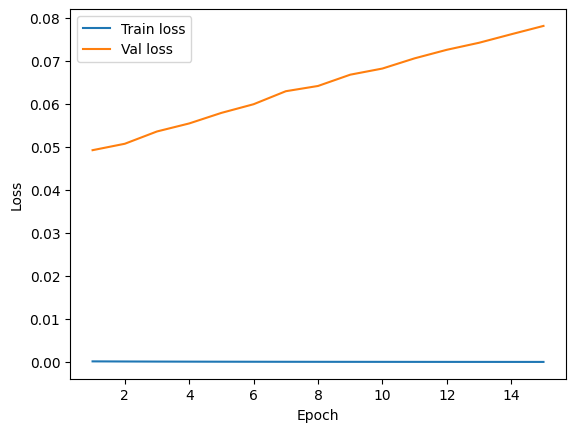

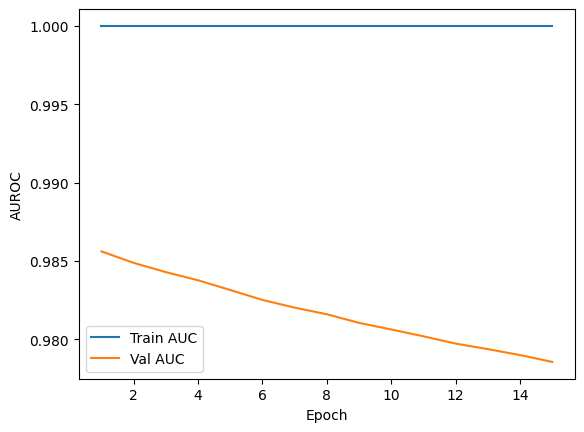

In [61]:
import matplotlib.pyplot as plt

epochs = range(1, n_epochs+1)

plt.figure()
plt.plot(epochs, train_losses, label="Train loss")
plt.plot(epochs, val_losses, label="Val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_aucs, label="Train AUC")
plt.plot(epochs, val_aucs, label="Val AUC")
plt.xlabel("Epoch"); plt.ylabel("AUROC"); plt.legend()
plt.show()


2. Test precision, recall, classification report, confusion matrix
After training:

In [62]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

# Get test predictions
model.eval()
ys, ps = [], []
with torch.no_grad():
    for x_seq, lengths, x_static, y in test_loader:
        x_seq = x_seq.to(device)
        lengths = lengths.to(device)
        x_static = x_static.to(device)
        y = y.to(device)
        out = model(x_seq, lengths, x_static)
        ys.append(y.cpu().numpy())
        ps.append(out.cpu().numpy())

ys = np.concatenate(ys)
ps = np.concatenate(ps)

# Choose threshold (0.5 or tuned on val)
thresh = 0.5
y_pred = (ps >= thresh).astype(int)

prec = precision_score(ys, y_pred)
rec  = recall_score(ys, y_pred)
f1   = f1_score(ys, y_pred)
print("Test precision:", prec)
print("Test recall:", rec)
print("Test F1:", f1)

print(classification_report(ys, y_pred, digits=3))
cm = confusion_matrix(ys, y_pred)
print(cm)


Test precision: 0.7142857142857143
Test recall: 0.6097560975609756
Test F1: 0.6578947368421053
              precision    recall  f1-score   support

         0.0      0.991     0.994     0.993      1732
         1.0      0.714     0.610     0.658        41

    accuracy                          0.985      1773
   macro avg      0.853     0.802     0.825      1773
weighted avg      0.984     0.985     0.985      1773

[[1722   10]
 [  16   25]]


Confusion matrix heatmap:

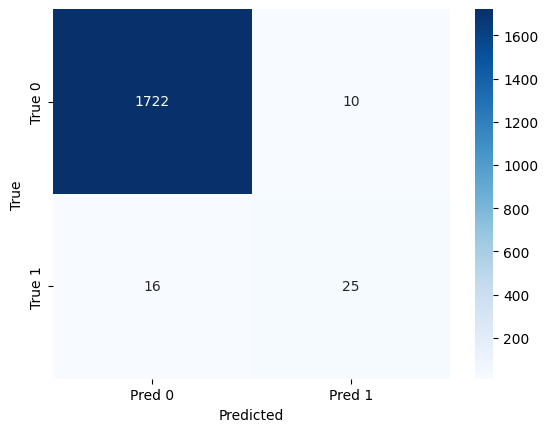

In [63]:
import seaborn as sns
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["True 0","True 1"])
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


3. ROC curve and AUC

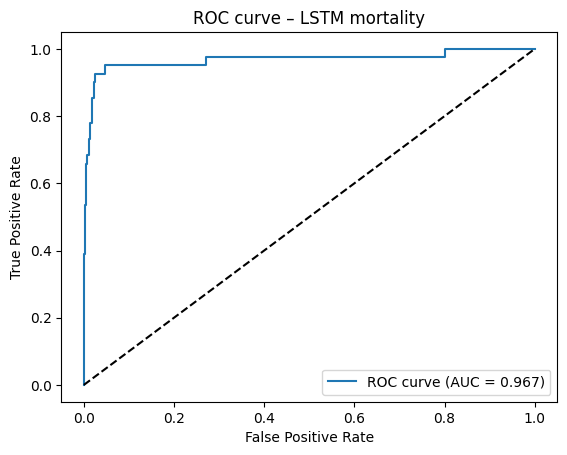

In [65]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(ys, ps)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve – LSTM mortality")
plt.legend(loc="lower right")
plt.show()
